<a href="https://colab.research.google.com/github/sushmasri4234/Internship/blob/main/28_04_25_AIML_Internship_Task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd

# Replace with your actual CSV filename
df = pd.read_csv('/content/sample_data/data.csv')

# Display first few rows and column names
print(df.head())
print(df.columns)


         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Assuming 'diagnosis' is the categorical column with 'B' values
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])

# Example: Suppose 'age', 'income' are features and 'target' is binary label (0/1)
X = df[['radius_mean', 'texture_mean']]
y = df['diagnosis'] # Replace with your target column

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize (important for logistic regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

[[67  4]
 [ 7 36]]
              precision    recall  f1-score   support

           0       0.91      0.94      0.92        71
           1       0.90      0.84      0.87        43

    accuracy                           0.90       114
   macro avg       0.90      0.89      0.90       114
weighted avg       0.90      0.90      0.90       114

ROC-AUC Score: 0.9731


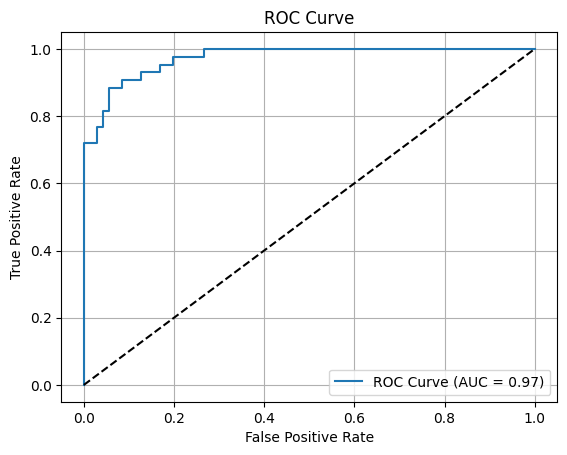

In [20]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Predict probabilities and labels
y_probs = model.predict_proba(X_test)[:, 1]
y_pred = model.predict(X_test)

# Confusion matrix & classification metrics
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# ROC-AUC
roc_auc = roc_auc_score(y_test, y_probs)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()


Confusion Matrix (Threshold = 0.3):
[[63  8]
 [ 4 39]]


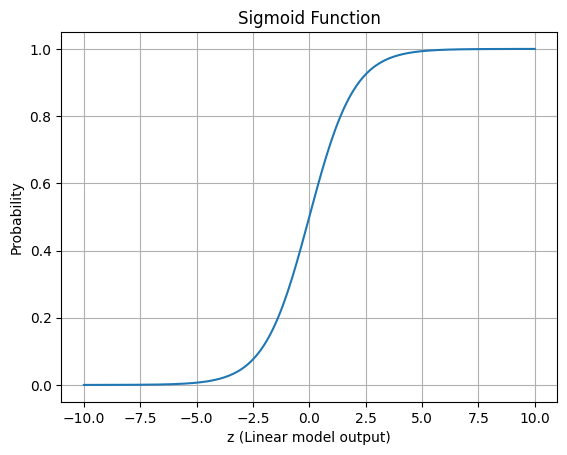

In [21]:
import numpy as np

# Tune threshold (default is 0.5)
custom_threshold = 0.3
y_custom_pred = (y_probs >= custom_threshold).astype(int)

print(f"Confusion Matrix (Threshold = {custom_threshold}):")
print(confusion_matrix(y_test, y_custom_pred))

# Sigmoid Function explanation:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Plot sigmoid
z_vals = np.linspace(-10, 10, 200)
sig_vals = sigmoid(z_vals)

plt.plot(z_vals, sig_vals)
plt.title("Sigmoid Function")
plt.xlabel("z (Linear model output)")
plt.ylabel("Probability")
plt.grid(True)
plt.show()
